### Context

In this project we will be using the [Electricity Load dataset](https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#) from UCI Machine Learning Repository. The dataset describes the 15-minutes load for 370 different clients in kW. Each column represent one client. The dataset has electricity consumption for these 370 houses for each 15 mins starting from `2011-01-01`, till `2015-01-01`. Some clients were created after 2011. In these cases consumption were considered zero.

### Problem statement

We need to build forecasting model to forecast electricity load of different clients (i.e. forecasting multiple time series at once) for certain period of time in future. 

### About the algorithm

This algorithm is known as `Multivariate Singular Spectrum Analysis (mSSA)`. This is a matrix factorization based method which can help in - 
- time series forecasting and 
- time series imputation

To learn more about this algorithm, please refer to this [paper](https://arxiv.org/pdf/2006.13448.pdf)

The python library to use this algorithm is not currently present in PyPi. The code repository is present in this GitHub repository - https://github.com/AbdullahO/mSSA. So we will be using a different to install the library in your local machine. Below we have provided the steps to follow to install this library.

### Steps to install the library

1. Create one GitHub account using this [link](https://github.com/), if you don't have already. 

2. You need to install Git Bash in your machine, to clone GitHub repositories in your local machine. Download and install git from [here](https://git-scm.com/downloads)

3. Next we will clone the GitHub repository using Anaconda Prompt (We could have done the same thing using Git Bash as well). Start your Anaconda Prompt

![alt text](images\time_series_1.png)

4. Then go to a directory where your workspace is or where you want to store the codebase

![alt text](images\time_series_2.png)

5. Now you are ready to clone the codebase from remote GitHub to your local machine. Do this by running the command - `git clone https://github.com/AbdullahO/mSSA.git` as shown below - 

![alt text](images\time_series_3.png)

6. Once you complete cloning the repository in to your local machine, you will see a folder named `mSSA` in the directory where you have cloned the repository as shown below - 

![alt text](images\time_series_4.png)

7. Once the repository is cloned, next you need to move inside of this directory using `cd mSSA`, as shown below - 

![alt text](images\time_series_5.png)

8. Now you are ready to install the library. To install this, run the command `pip3 install .`, as shown below - 

![alt text](images\time_series_6.png)

Now the library is installed, and you are ready to use this for time series forecasting

### Loading libraries

In [2]:
import io
import numpy as np
import pandas as pd

#from mssa.mssa import mSSA

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Loading data

The dataset is in a zipped file, we will use the below piece of code to unzip the file

In [3]:
import zipfile
with zipfile.ZipFile('LD2011_2014.txt.zip', 'r') as zip_ref:
    zip_ref.extractall()

Once unzip is complete, if you go to your working directory, you will find a text file named `LD2011_2014.txt`. And check the data by opening this file, you will see all the values are separated by `;`. Now we will load this dataset in this notebook session.

In [4]:
data = pd.read_csv('LD2011_2014.txt', sep=';')
data.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


As you can see above, the first column name is blank and this is the `time` of the dataset as this is a time series dataset

In [6]:
data.tail()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
140251,2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182",...,"276,945039257673",28200.0,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162"
140252,2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147",...,"279,800142755175",28300.0,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027"
140253,2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112",...,"284,796573875803",27800.0,"1556,96202531646","1318,18181818182","27,3794002607562","9,3622001170275","670,763827919227","153,589315525876","670,087976539589","6864,86486486487"
140254,2014-12-31 23:45:00,"1,26903553299492","21,3371266002845","1,73761946133797","166,666666666667","85,3658536585366","285,714285714286","10,1752402487281","225,589225589226","64,6853146853147",...,"246,252676659529",28000.0,"1443,03797468354","909,090909090909","26,0756192959583","4,09596255119953","664,618086040386","146,911519198664","646,627565982405","6540,54054054054"
140255,2015-01-01 00:00:00,"2,53807106598985","19,9146514935989","1,73761946133797","178,861788617886","84,1463414634146","279,761904761905","10,1752402487281","249,158249158249","62,9370629370629",...,"188,436830835118",27800.0,"1409,28270042194","954,545454545455","27,3794002607562","4,09596255119953","628,621597892889","131,886477462437","673,020527859238","7135,13513513513"


And also, if you look above, the fractional part of the numbers are separated by `,` instead of `.`. We need to fix this as well. There are many different ways for doing this data cleaning. But here we will fix these issues at the time of loading the dataset itself. So we need to delete the existing dataframe and load it in a different way so that we can fix the issues mentioned.

In [7]:
# removing the existing dataframe
del data

In [8]:
# loading the data again
data = pd.read_csv('LD2011_2014.txt', sep=';', decimal=',')

In [9]:
data.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.tail()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
140251,2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
140252,2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
140253,2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
140254,2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
140255,2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


Now, you can see that the issues are fixed.

Next we will pre-process the dataset further. Specifically we will:

1. Pick the first 20 houses MT-001 to MT-020
2. Remove the data before 2012, since most of its readings are zeros
3. Aggregate the data into hourly readings by averaging the 15-minutes readings.

In [11]:
#removing data before 2012
data = data.iloc[8760*4:]

#picking the first 20 houses and saving it to another variable data_small
data_small = data.iloc[:, :21]

# Aggregating the data
data_small['time'] =pd.to_datetime(data_small['Unnamed: 0']).dt.ceil('1h') 
data_small = data_small.drop(['Unnamed: 0'], axis = 1)
agg_dict = {}
for col in data_small.columns[:-1]:
    agg_dict[col] ='mean'
final_data = data_small.groupby(['time']).agg(agg_dict)
print('data aggregated..')
data_small.shape

data aggregated..


(105216, 21)

In [12]:
final_data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020
time,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,4.124365,22.759602,77.324066,138.211382,72.256098,348.214286,8.620690,279.461279,72.989510,87.903226,59.798808,0.0,47.678275,36.534780,0.0,55.096811,76.145553,328.274760,15.577889,55.066079
2012-01-01 02:00:00,4.758883,23.115220,77.324066,137.195122,70.121951,339.285714,6.924816,276.094276,67.307692,82.258065,55.886736,0.0,46.019900,34.141672,0.0,52.249431,73.225517,305.910543,15.452261,51.101322
2012-01-01 03:00:00,4.124365,22.937411,77.324066,136.686992,66.463415,286.458333,6.642171,239.898990,63.811189,72.043011,54.582712,0.0,43.532338,33.024888,0.0,43.422551,61.994609,276.357827,14.070352,48.458150
2012-01-01 04:00:00,4.758883,22.048364,77.324066,102.134146,50.304878,191.964286,4.804975,200.336700,41.520979,46.236559,38.189270,0.0,35.862355,26.005105,0.0,35.449886,46.495957,188.498403,7.663317,39.427313
2012-01-01 05:00:00,4.441624,21.870555,77.324066,81.808943,45.121951,155.505952,3.533070,180.134680,45.891608,42.473118,33.904620,0.0,42.288557,24.409700,0.0,33.599089,35.265049,160.543131,6.155779,34.361233


As you can see above, each column of the dataframe `final_data` contains hourly reading starting from 2012-01-01 01:00 until 2015-01-01 01:00. Now we will split the observations into a training and testing sets. Specifically, the training set will start at 2012-01-01 01:00 until 2014-12-18 00:00, and the test set will have the rest of the observations.

In [13]:
train_data = final_data.loc['2012-12-31':'2014-12-18']
test_data = final_data.loc['2014-12-19':]

Let's check how the training and test data looks like

In [14]:
train_data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020
time,,,,,,,,,,,,,,,,,,,,
2012-12-31 00:00:00,2.220812,24.182077,3.475239,151.930894,59.451220,258.184524,6.076880,269.360269,57.692308,62.096774,61.289121,0.0,40.630182,35.258456,0.0,50.825740,56.603774,245.207668,9.673367,42.511013
2012-12-31 01:00:00,1.903553,23.115220,3.475239,126.524390,54.573171,220.982143,4.239683,245.791246,48.513986,57.795699,46.758569,0.0,40.630182,34.779834,0.0,41.998861,48.068284,188.498403,7.537688,42.951542
2012-12-31 02:00:00,1.586294,23.293030,3.475239,100.101626,43.597561,186.755952,4.098361,219.696970,42.395105,50.806452,45.268256,0.0,42.910448,30.631780,0.0,33.599089,43.126685,168.530351,6.407035,33.920705
2012-12-31 03:00:00,1.903553,22.403983,3.475239,89.939024,42.682927,156.250000,3.533070,204.545455,39.335664,48.387097,38.561848,0.0,41.873964,28.876835,0.0,28.473804,39.757412,155.750799,6.407035,30.616740
2012-12-31 04:00:00,2.220812,22.226174,3.475239,75.711382,38.719512,139.880952,3.391747,230.639731,36.276224,46.774194,31.669151,0.0,44.776119,26.164646,0.0,28.046697,36.837376,144.568690,5.276382,29.074890


In [15]:
test_data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020
time,,,,,,,,,,,,,,,,,,,,
2014-12-19 00:00:00,2.855330,20.448080,1.737619,164.634146,92.378049,276.785714,7.066139,274.410774,61.625874,61.290323,47.876304,145.744681,38.349917,54.881940,52.944215,49.829157,51.437556,300.319489,9.547739,47.136564
2014-12-19 01:00:00,2.538071,18.669986,1.737619,136.686992,82.621951,228.422619,4.663652,218.855219,52.447552,49.193548,40.983607,125.531915,39.593698,48.181238,41.967975,38.154897,41.554358,253.993610,9.045226,38.546256
2014-12-19 02:00:00,3.172589,17.247511,1.737619,117.378049,67.073171,198.660714,3.815715,201.178451,44.143357,43.817204,37.257824,118.617021,33.996683,40.682833,37.190083,33.314351,36.612758,230.031949,7.914573,37.004405
2014-12-19 03:00:00,2.855330,16.536273,1.737619,104.674797,60.670732,176.339286,3.533070,175.925926,43.269231,43.817204,34.649776,126.063830,35.240464,39.246969,38.094008,32.175399,34.141959,195.686901,7.286432,33.259912
2014-12-19 04:00:00,2.538071,16.358464,1.737619,105.691057,65.243902,164.434524,3.674392,206.228956,41.083916,47.580645,33.718331,120.212766,39.179104,39.566050,36.931818,29.043280,34.141959,190.894569,7.286432,28.634361


### Model building

Let's try to understand how this algorithm works, below is a schematic of this algorithm - 

![alt text](images\time_series_7.png)

\We can further explore the `page matrix` as - 

![alt text](images/time_series_8.png)

As our data is now ready, we can now use the algorithm to fit the training data for forecasting. Before fitting the data, let's check what are the hyper-parameters this algorithm uses and what are their meaning?

In [16]:
help(mSSA)

Help on class mSSA in module mssa.mssa:

class mSSA(builtins.object)
 |  mSSA(rank=None, rank_var=1, T=25000000, T_var=None, gamma=0.2, T0=10, col_to_row_ratio=5, agg_method='average', uncertainty_quantification=True, p=None, direct_var=True, L=None, persist_L=None, normalize=True, fill_in_missing=False, segment=False, agg_interval=None, threshold=None)
 |  
 |  :param rank: (int) the number of singular values to retain in the means prediction model
 |  :param rank_var: (int) the number of singular values to retain in the variance prediction model
 |  :param gamma: (float) (0,1) fraction of T after which the last sub-model is fully updated
 |  :param segment: (bool) If True, several sub-models will be built, each with a moving windows of length T.
 |  :param T: (int) Number of entries in each submodel in the means prediction model
 |  :param T0: (int) Minimum number of observations to fit a model. (Default 100)
 |  :param col_to_row_ratio: (int) the ratio of no. columns to the number o

As you can see from above, mSSA class can take several parameters that might affect its performance. Specifically, the parameter `rank` (int), which determines the `number of singular values` to retain in the means prediction model. The default value is `None`, where the model will choose an appropriate rank using the method in the paper:
[The Optimal Hard Threshold for Singular Values is 4/√3](https://arxiv.org/pdf/1305.5870.pdf)

We can also tune the 'rank' hyperparameter and choose the optimal value depending on the dataset. Here, we will use rank=20.

In [17]:
model = mSSA(rank = 20)
model.update_model(train_data)

### Prediction

#### Forecasting one hour ahead for the next day

Let's start by forecasting the first day for client `MT_020` and compare it visually with the test data. Now we will produce the forecast for the next day using predict for the range `2014-12-19 01:00:00` to `2014-12-20  00:00:00` along with the 95% confidence interval.

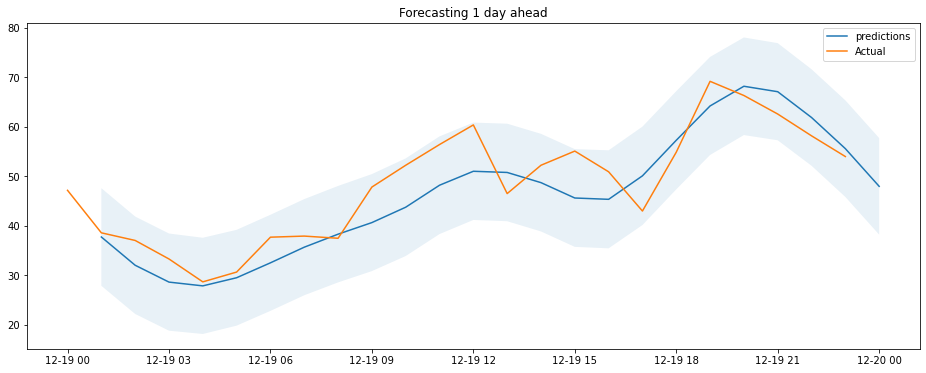

In [18]:
df = model.predict('MT_020','2014-12-19 01:00:00','2014-12-20  00:00:00')

plt.figure(figsize=(16, 6))
plt.plot( df['Mean Predictions'], label = 'predictions')
plt.fill_between(df.index, df['Lower Bound'],df['Upper Bound'], alpha = 0.1)
plt.plot(test_data['MT_020'].iloc[:len(df['Mean Predictions'])], label = 'Actual', alpha = 1.0)
plt.title('Forecasting 1 day ahead')
plt.legend()
plt.show()

### Observation

As you can see, the predicted electricity demand is very close to the actual electricity demand and the actual demand is always within the confidence band of the forecasts. So we can conclude that this model has been able to forecast this time series very accurately.

You can also change the confidence used to produce the prediction interval. For example, we can produce the predictions with a 99.9% confidence using the confidence parameter of the predict function.

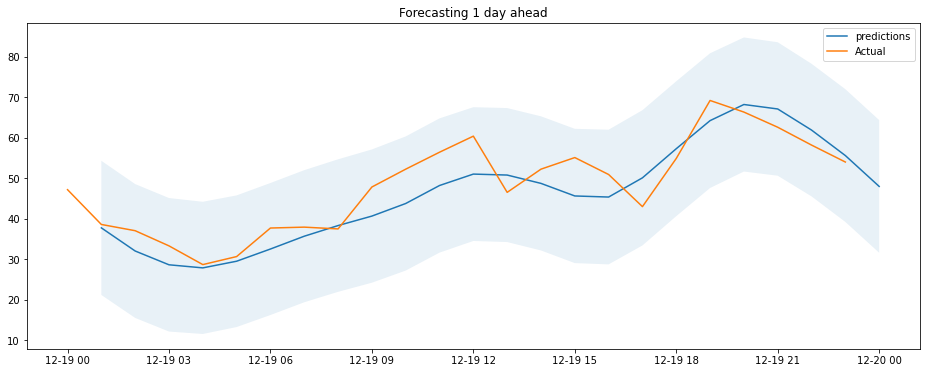

In [19]:
df = model.predict('MT_020','2014-12-19 01:00:00','2014-12-20  00:00:00', confidence=99.9)

plt.figure(figsize=(16, 6))
plt.plot( df['Mean Predictions'], label = 'predictions')
plt.fill_between(df.index, df['Lower Bound'],df['Upper Bound'], alpha = 0.1)
plt.plot(test_data['MT_020'].iloc[:len(df['Mean Predictions'])], label = 'Actual', alpha = 1.0)
plt.title('Forecasting 1 day ahead')
plt.legend()
plt.show()

### Observation

Here as well, as you can see when we increased the confidence level to 99.9%, then the confidence interval has increased as compared to the previous one (where confidence level was 95%), providing us with more safety net so that we don't incorrectly forecast the actual electricity demand.

#### Forecast hourly data for all clients for the next seven days

Now, we will do a more quantitative test by forecasting the next seven days using a rolling window approach. Specifically, we will forecast the next seven days one day at a time for all 20 houses. Note that between forecasts, `we will incrementally train the data on the already predicted timeframe`.

In [20]:
#initialize prediction array
predictions = np.zeros((len(test_data.columns), 24*7))
upper_bound = np.zeros((len(test_data.columns), 24*7))
lower_bound = np.zeros((len(test_data.columns), 24*7))
actual = test_data.values[:24*7, :]

# specify start time
start_time = pd.Timestamp('2014-12-19 01:00:00')

# predict for seven days
days = 7

for day in range(days):
    # get the final timestamp in the day
    end_time = start_time + pd.Timedelta(hours=23)
    # convert timestamps to string
    start_str = start_time.strftime('%Y-%m-%d %H:%M:%S')
    end_str = end_time.strftime('%Y-%m-%d %H:%M:%S')
    # predict for each house
    for i, column in enumerate(test_data.columns):
        # Forecast
        df_30 = model.predict(column,start_str,end_str)
        predictions[i,day*24:(day+1)*24] = df_30['Mean Predictions']
        upper_bound[i,day*24:(day+1)*24] = df_30['Upper Bound']
        lower_bound[i,day*24:(day+1)*24] = df_30['Lower Bound']
    
    # fit the model with the already predicted values 
    df_insert = test_data.iloc[day*24:24*(day+1), :]
    model.update_model(df_insert)
    
    # update start_time
    start_time = start_time + pd.Timedelta(hours=24)

Now, we are calculating the error

In [21]:
Y = actual[:,:]
Y_h = predictions.T[:,:]
mse = np.sqrt(np.mean(np.square(Y-Y_h)))
print ('Forecasting accuracy (RMSE):',mse)

Forecasting accuracy (RMSE): 27.921274055416816


Now, let's inspect our forecasts visually for all the 20 time series

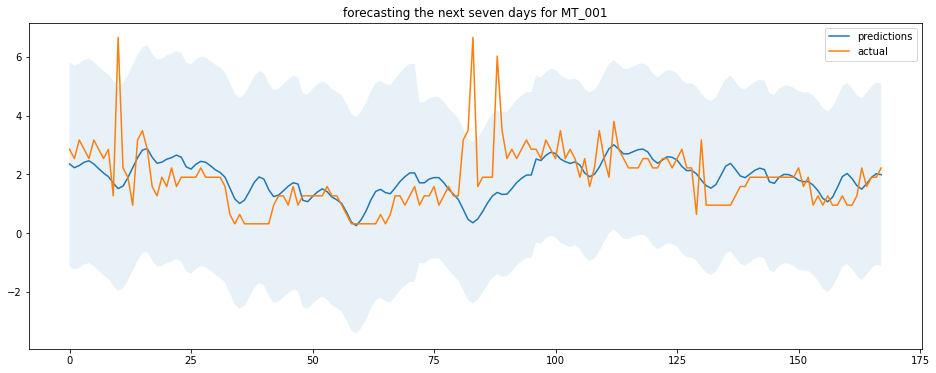

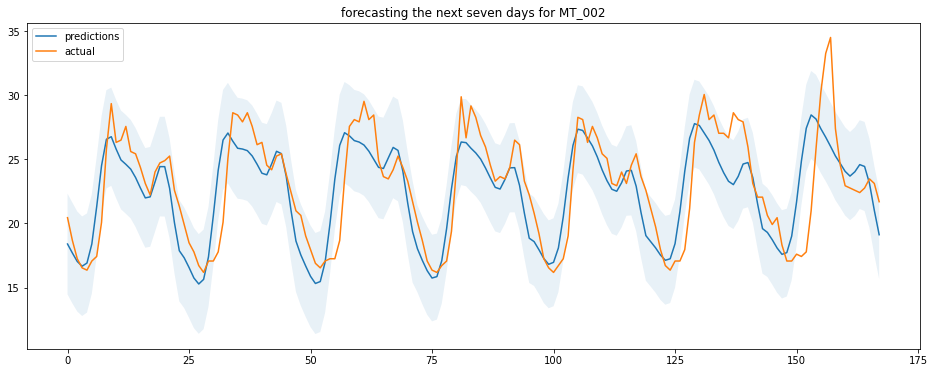

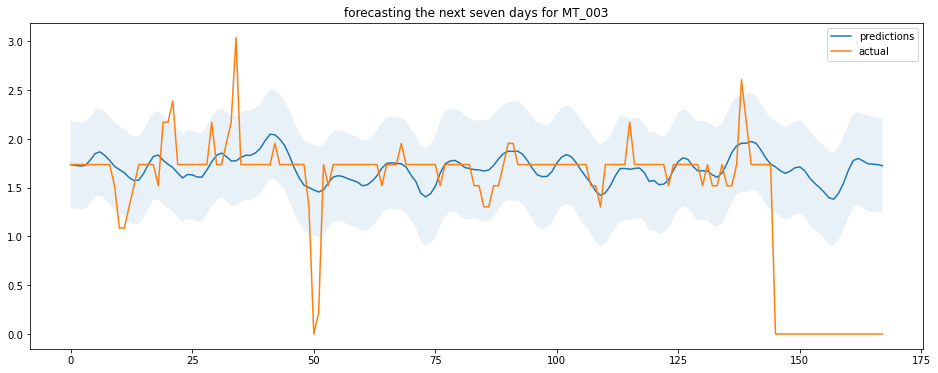

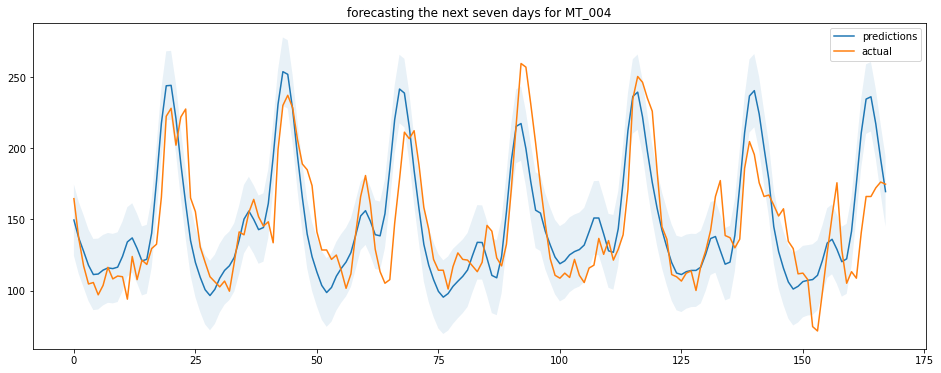

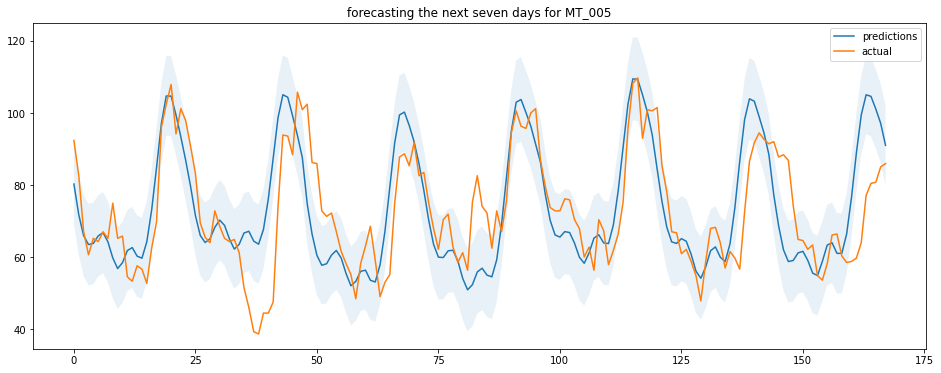

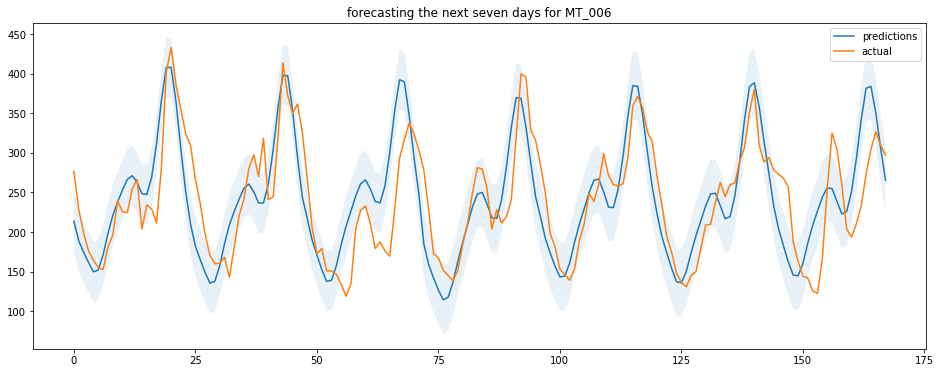

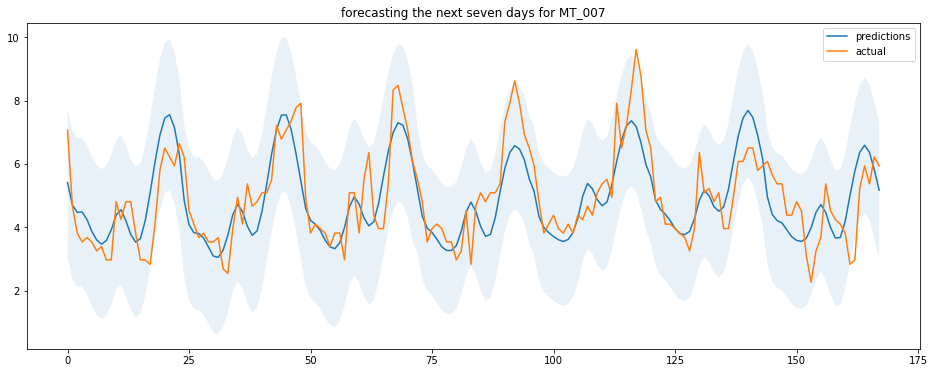

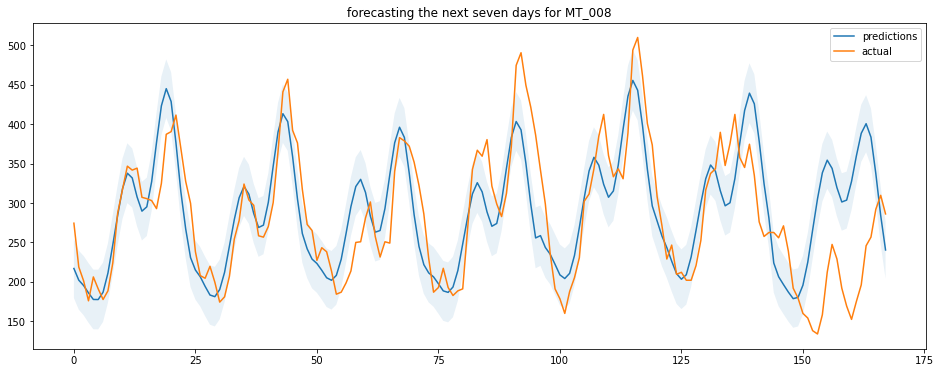

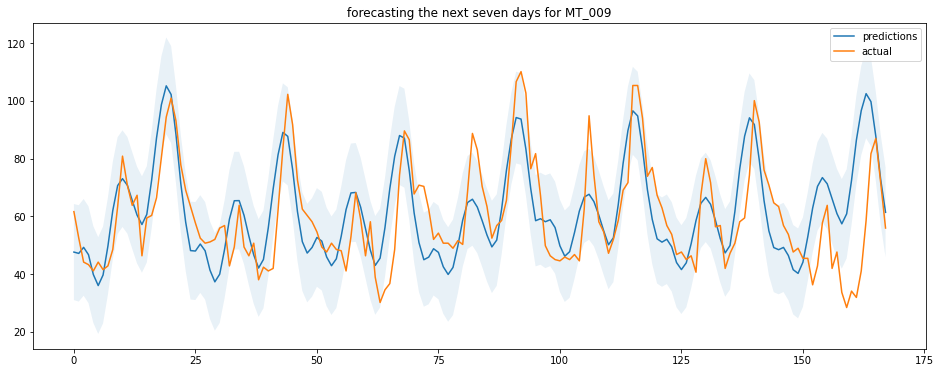

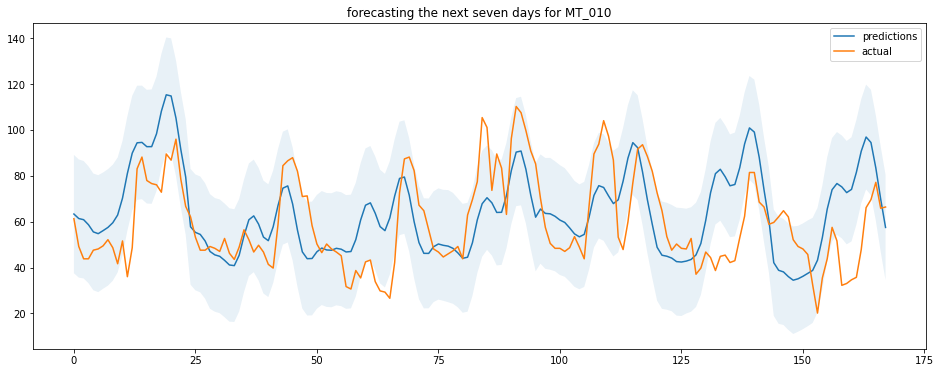

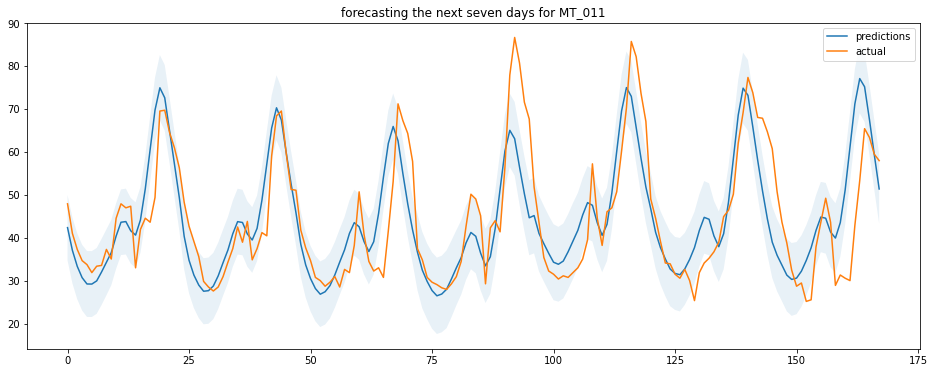

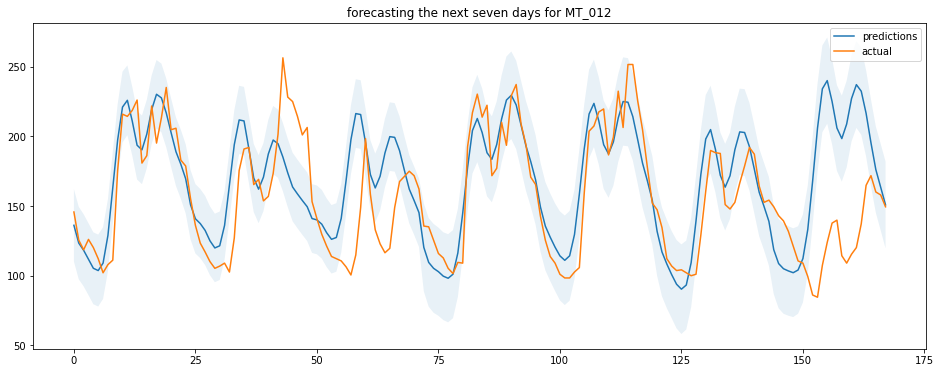

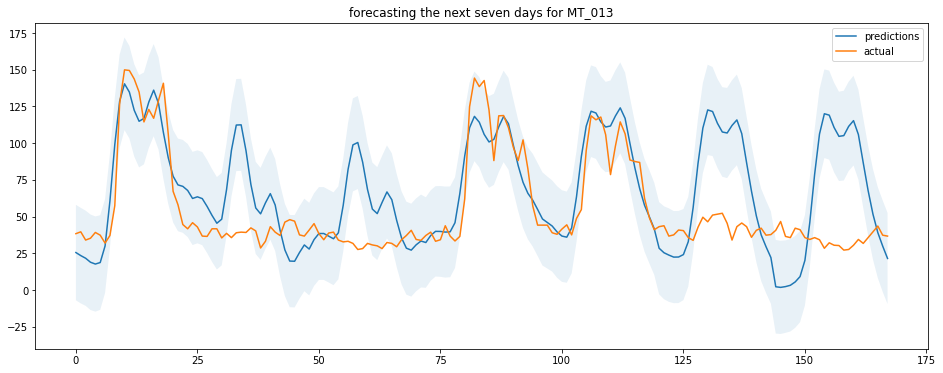

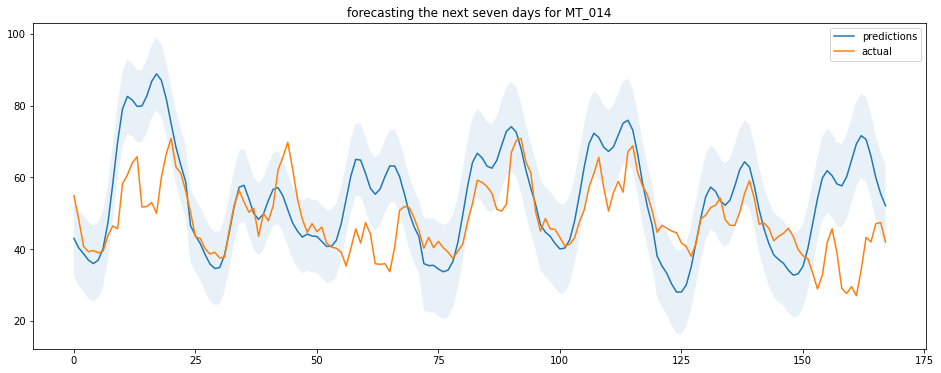

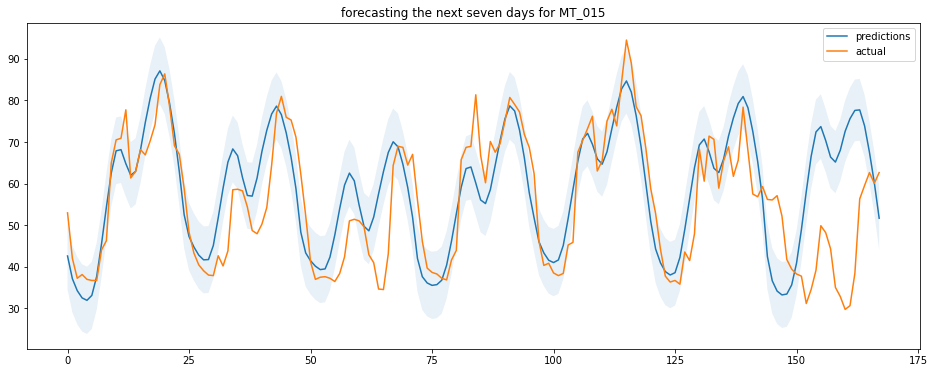

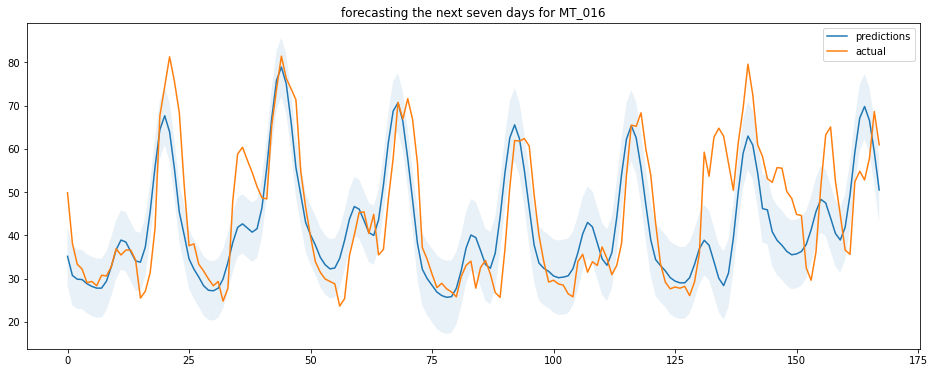

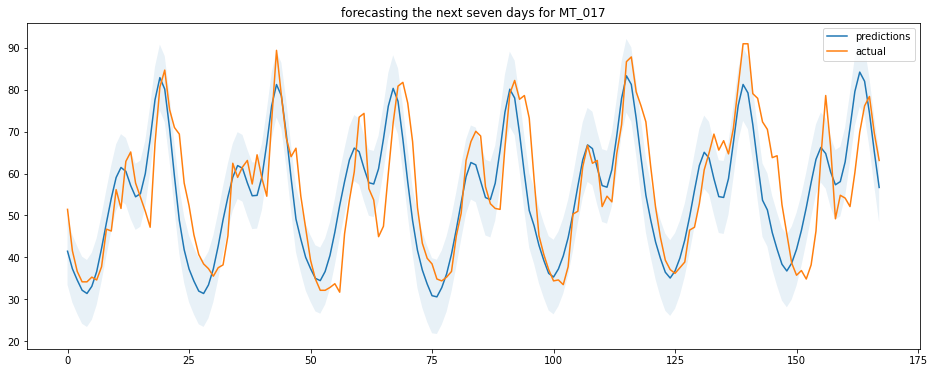

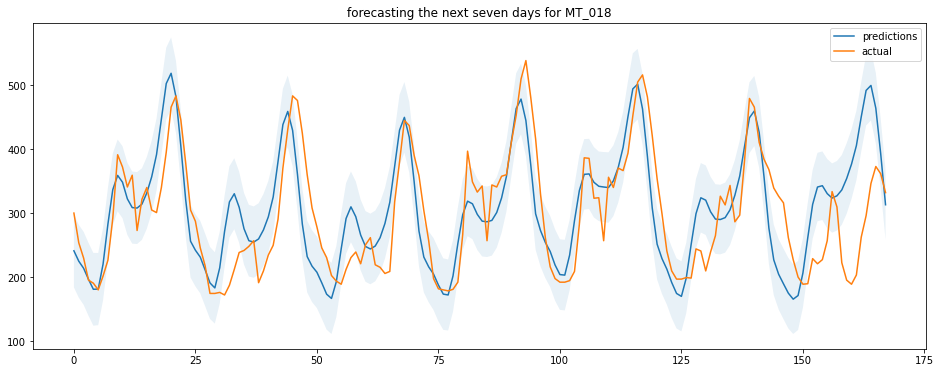

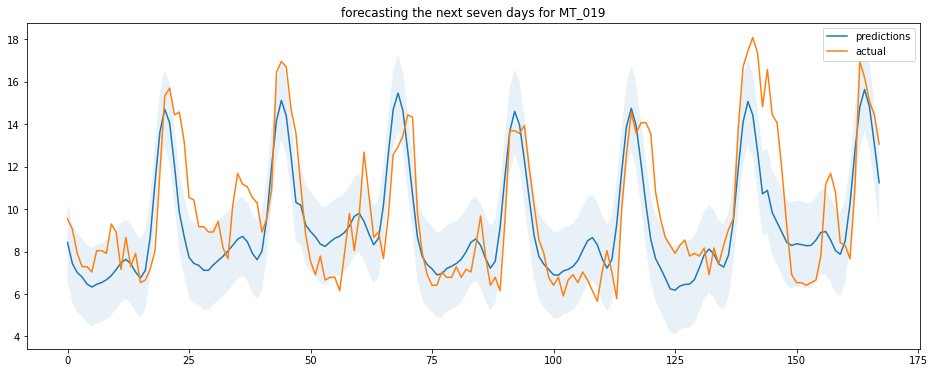

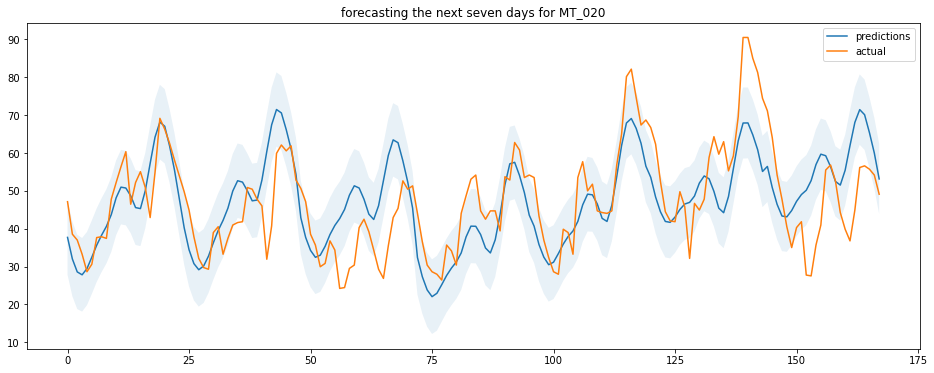

In [22]:
for i in range(20):
    plt.figure(figsize=(16, 6))
    plt.title('forecasting the next seven days for %s'%test_data.columns[i])
    plt.plot(predictions[i, : 24*7], label= 'predictions')
    plt.fill_between(np.arange(24*7), lower_bound[i, : 24*7], upper_bound[i, : 24*7], alpha = 0.1)
    plt.plot(actual[:24*7, i],label = 'actual')
    plt.legend()
plt.show()

### Conclusion

For the all the above 20 different time series predictions on `test data` this model has performed very well in all the time series except for few ones like `MT_003`, `MT_013` and `MT_014`. The poor performance on those three time series might be due to that those were more noisy than other time series. If you look into the time series above `MT_003`, you will see that in some days the consumption goes to zero, which does not look correct.

So to further improve this model on those time series, we might want to 
- clean the data first, by first understanding what has caused those noisy data points and/or
- by tuning/grid searching optimal hyper-parameters of this algorithm (e.g. - rank, gamma, col_to_row_ratio, L etc)

### Imputing missing values

This algorithm works very well in imputing missing values as well. To understand this let's add some some missing values in any of the time series above randomly. Here we are creating missing values for the entity `MT_001` in `20%` of days for the month of January in 2014. We only use this data for imputing the missing values for `MT_001` which we created.

Before we apply the missing values, let's first save the original time series in a separate variable, so that we can compare them with the imputed values at a later point in time. 

In [23]:
final_ts = pd.DataFrame(final_data['MT_001'].loc['2014-01-01 01:00:00':'2014-01-08 01:00:00']).copy()

Now we will create missing values randomly in `20%` of the observations, save it in a different variable and create a pandas dataframe from it.

In [24]:
ts_with_missing_values = final_data['MT_001'].loc['2014-01-01 01:00:00':'2014-01-08 01:00:00']
ts_with_missing_values.loc[ts_with_missing_values.sample(frac=0.2).index] = np.nan
ts_with_missing_values = ts_with_missing_values.rename('MT_001_with_missing_values')
ts_with_missing_values = pd.DataFrame(ts_with_missing_values).reset_index()

Now let's plot the time series and see how it looks like - 

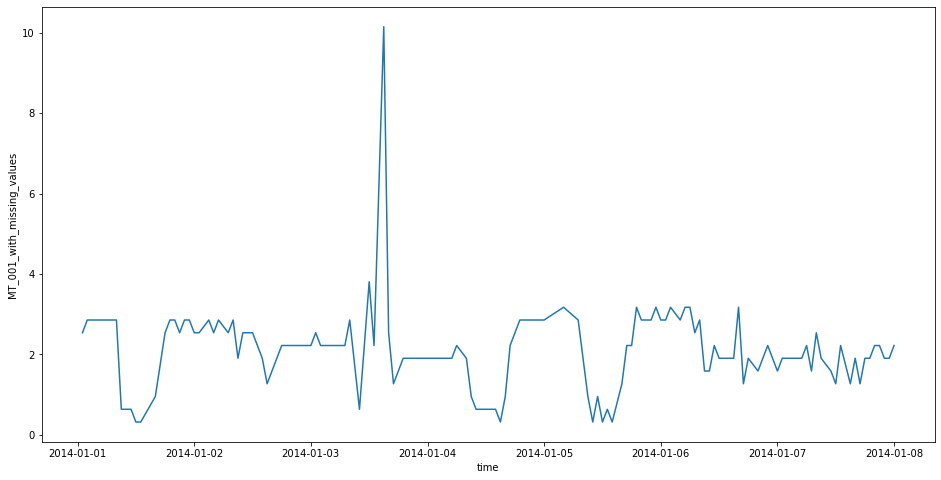

In [25]:
figure = plt.figure(figsize=(16, 8))
sns.lineplot(data = ts_with_missing_values,
             x='time',
             y='MT_001_with_missing_values');

Now, let's build the model and pass the time series with missing values into it

In [26]:
ts_with_missing_values = ts_with_missing_values.set_index('time')

Now, let's build the model with the same rank that we used above i.e. 20

In [27]:
model_for_missing_values = mSSA(rank = 20)
model_for_missing_values.update_model(ts_with_missing_values)

Below we are predicting the values for the entire time series. We will provide the prediction for missing values in that time series

In [28]:
imputed_predictions = model_for_missing_values.predict('MT_001_with_missing_values','2014-01-01 01:00:00','2014-01-08 01:00:00')

Now, let's create another dataset, containing three time series - 
- time series with missing values
- time series predictions predicted by the model and
- the original time series from the dataset without missing values 

In [29]:
combined_data = pd.concat([ts_with_missing_values, imputed_predictions, final_ts['MT_001'].loc['2014-01-01':'2014-01-08']], 
                          axis=1)
combined_data = combined_data.reset_index()

Let's plot these three time series to compare the predicted missing values against the original values in the time series.

#### The Original Series 

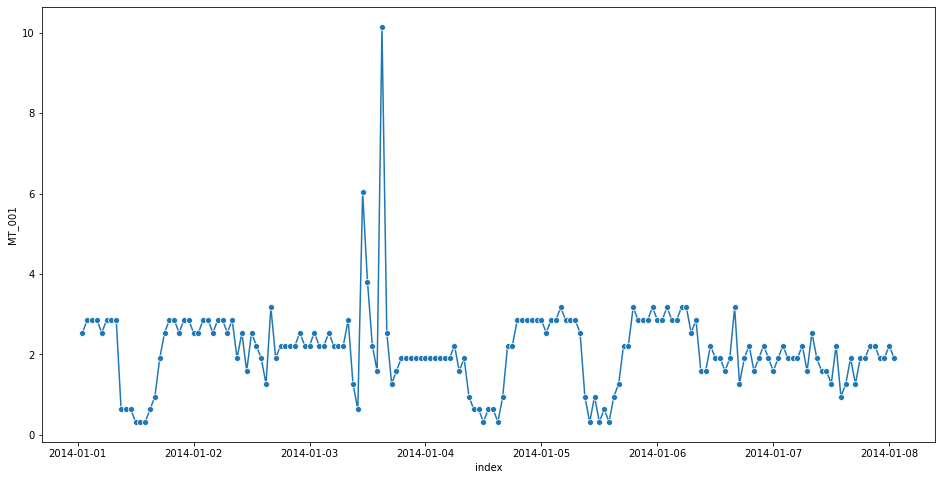

In [33]:
figure = plt.figure(figsize=(16, 8))
sns.lineplot(data = combined_data,
             x='index',
             y='MT_001',
             marker='o');

#### The Series with Missing Values 

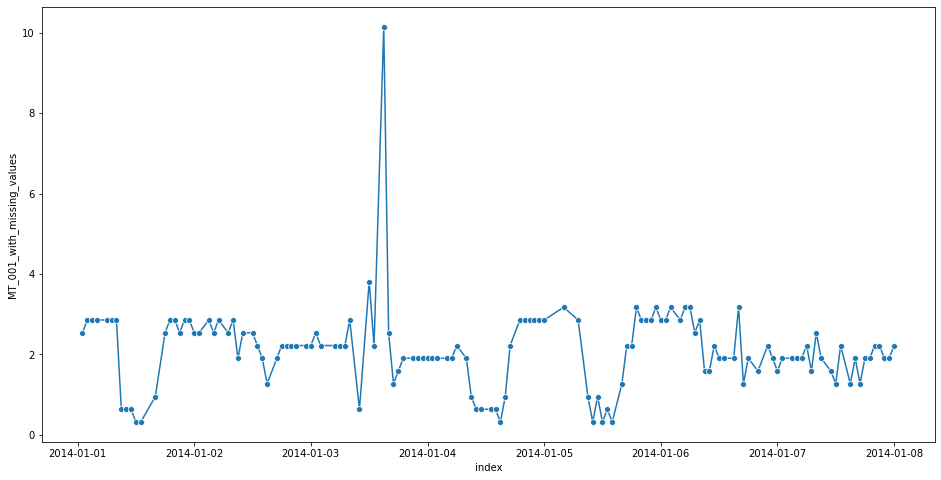

In [34]:
figure = plt.figure(figsize=(16, 8))
sns.lineplot(data = combined_data,
             x='index',
             y='MT_001_with_missing_values',
             marker='o');

#### The Predicted Series 

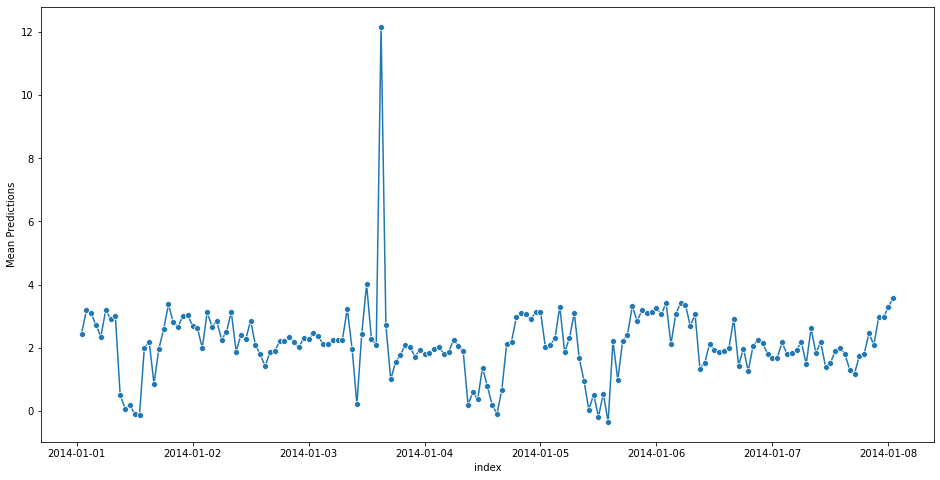

In [35]:
figure = plt.figure(figsize=(16, 8))
sns.lineplot(data = combined_data,
             x='index',
             y='Mean Predictions',
             marker='o');